Processing dataset: AUDUSD
Processing dataset: BRENT.CMDUSD
Processing dataset: BTCUSD
Processing dataset: COCOA.CMDUSD
Processing dataset: COFFEE.CMDUSX
Processing dataset: COPPER.CMDUSD
Processing dataset: COTTON.CMDUSX
Processing dataset: DOLLAR.IDXUSD
Processing dataset: ETHUSD
Processing dataset: EURUSD
Processing dataset: GAS.CMDUSD
Processing dataset: GBPUSD
Processing dataset: LIGHT.CMDUSD
Processing dataset: NZDUSD
Processing dataset: OJUICE.CMDUSX
Processing dataset: SOYBEAN.CMDUSX
Processing dataset: SUGAR.CMDUSD
Processing dataset: UKGILT.TRGBP
Processing dataset: USA30.IDXUSD
Processing dataset: USA500.IDXUSD
Processing dataset: USATECH.IDXUSD
Processing dataset: USDCAD
Processing dataset: USDCHF
Processing dataset: USDJPY
Processing dataset: USSC2000.IDXUSD
Processing dataset: USTBOND.TRUSD
Processing dataset: XAGUSD
Processing dataset: XAUUSD
Correlation of other datasets with diesel prices:
BRENT.CMDUSD       0.959523
LIGHT.CMDUSD       0.945735
USTBOND.TRUSD      0.729

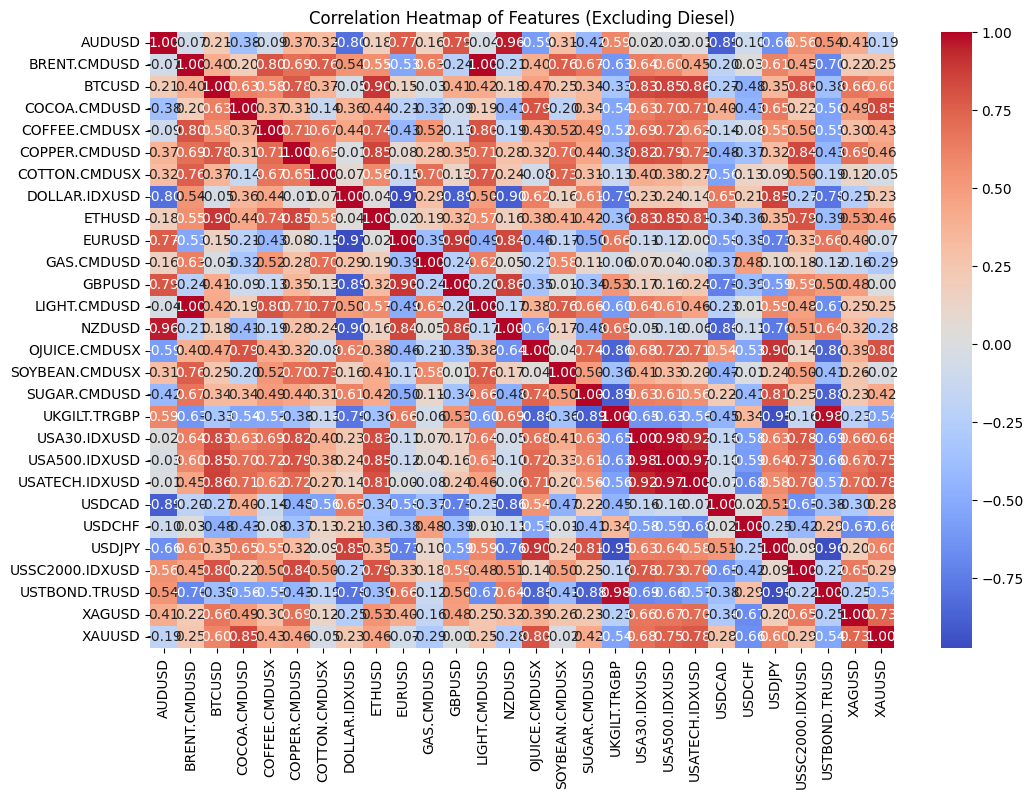

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the diesel dataset
diesel_file = 'DIESEL.CMDUSD_Candlestick_1_Hour_BID_01.01.2020-31.08.2024.csv'
diesel_data = pd.read_csv(diesel_file)

# Parse the 'Local time' column with timezone support
diesel_data['Local time'] = pd.to_datetime(diesel_data['Local time'], format='%d.%m.%Y %H:%M:%S.%f GMT%z', utc=True)
diesel_data.set_index('Local time', inplace=True)

# Extract the diesel 'Close' price as the target variable
diesel_close = diesel_data[['Close']].rename(columns={'Close': 'Diesel_Close'})

# Create a dictionary to hold the other datasets
datasets = {
    'AUDUSD': 'AUDUSD_Candlestick_1_Hour_BID_01.01.2020-31.08.2024.csv',
    'BRENT.CMDUSD': 'BRENT.CMDUSD_Candlestick_1_Hour_BID_01.01.2020-31.08.2024.csv',
    'BTCUSD': 'BTCUSD_Candlestick_1_Hour_BID_01.01.2020-31.08.2024.csv',
    'COCOA.CMDUSD': 'COCOA.CMDUSD_Candlestick_1_Hour_BID_01.01.2020-31.08.2024.csv',
    'COFFEE.CMDUSX': 'COFFEE.CMDUSX_Candlestick_1_Hour_BID_01.01.2020-31.08.2024.csv',
    'COPPER.CMDUSD': 'COPPER.CMDUSD_Candlestick_1_Hour_BID_01.01.2020-31.08.2024.csv',
    'COTTON.CMDUSX': 'COTTON.CMDUSX_Candlestick_1_Hour_BID_01.01.2020-31.08.2024.csv',
    'DOLLAR.IDXUSD': 'DOLLAR.IDXUSD_Candlestick_1_Hour_BID_01.01.2020-31.08.2024.csv',
    'ETHUSD':'ETHUSD_Candlestick_1_Hour_BID_01.01.2020-31.08.2024.csv',
    'EURUSD':'EURUSD_Candlestick_1_Hour_BID_01.01.2020-31.08.2024.csv',
    'GAS.CMDUSD': 'GAS.CMDUSD_Candlestick_1_Hour_BID_01.01.2020-31.08.2024.csv',
    'GBPUSD':'GBPUSD_Candlestick_1_Hour_BID_01.01.2020-31.08.2024.csv',
    'LIGHT.CMDUSD': 'LIGHT.CMDUSD_Candlestick_1_Hour_BID_01.01.2020-31.08.2024.csv',
    'NZDUSD': 'NZDUSD_Candlestick_1_Hour_BID_01.01.2020-31.08.2024.csv',
    'OJUICE.CMDUSX': 'OJUICE.CMDUSX_Candlestick_1_Hour_BID_01.01.2020-31.08.2024.csv', 
    'SOYBEAN.CMDUSX': 'SOYBEAN.CMDUSX_Candlestick_1_Hour_BID_01.01.2020-31.08.2024.csv',     
    'SUGAR.CMDUSD': 'SUGAR.CMDUSD_Candlestick_1_Hour_BID_01.01.2020-31.08.2024.csv',      
    'UKGILT.TRGBP': 'UKGILT.TRGBP_Candlestick_1_Hour_BID_01.01.2020-31.08.2024.csv', 
    'USA30.IDXUSD': 'USA30.IDXUSD_Candlestick_1_Hour_BID_01.01.2020-31.08.2024.csv',      
    'USA500.IDXUSD': 'USA500.IDXUSD_Candlestick_1_Hour_BID_01.01.2020-31.08.2024.csv',      
    'USATECH.IDXUSD': 'USATECH.IDXUSD_Candlestick_1_Hour_BID_01.01.2020-31.08.2024.csv',   
    'USDCAD': 'USDCAD_Candlestick_1_Hour_BID_01.01.2020-31.08.2024.csv',
    'USDCHF': 'USDCHF_Candlestick_1_Hour_BID_01.01.2020-31.08.2024.csv',    
    'USDJPY': 'USDJPY_Candlestick_1_Hour_BID_01.01.2020-31.08.2024.csv',
    'USSC2000.IDXUSD': 'USSC2000.IDXUSD_Candlestick_1_Hour_BID_01.01.2020-31.08.2024.csv',
    'USTBOND.TRUSD': 'USTBOND.TRUSD_Candlestick_1_Hour_BID_01.01.2020-31.08.2024.csv',  
    'XAGUSD': 'XAGUSD_Candlestick_1_Hour_BID_01.01.2020-31.08.2024.csv',
    'XAUUSD': 'XAUUSD_Candlestick_1_Hour_BID_01.01.2020-31.08.2024.csv',
}


# Initialize a DataFrame for combined data
combined_data = diesel_close.copy()

# Process each dataset
for name, file in datasets.items():
    print(f"Processing dataset: {name}")
    # Load the dataset
    data = pd.read_csv(file)
    
    # Parse the 'Local time' column with timezone support
    data['Local time'] = pd.to_datetime(data['Local time'], format='%d.%m.%Y %H:%M:%S.%f GMT%z', utc=True)
    data.set_index('Local time', inplace=True)
    
    # Keep only the 'Close' price and rename it to the dataset name
    data = data[['Close']].rename(columns={'Close': name})
    
    # Join with the combined dataset
    combined_data = combined_data.join(data, how='inner')

# Extract the target variable and feature data separately
target = combined_data['Diesel_Close']
features = combined_data.drop(columns=['Diesel_Close'])

# Calculate the correlation of each feature with diesel prices
correlation_with_diesel = features.corrwith(target).abs().sort_values(ascending=False)

# Display correlation results
print("Correlation of other datasets with diesel prices:")
print(correlation_with_diesel)

# Visualize the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(features.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Heatmap of Features (Excluding Diesel)")
plt.show()


# lagged version 

R-squared: 0.9895
RMSE: 4.6522
MAE: 3.5677
Top 10 Features by Importance:
DIESEL_ema10_lagged         0.902880
DIESEL_bb_low_lagged        0.096315
DIESEL_rsi_lagged           0.000207
BRENT.CMDUSD                0.000079
LIGHT.CMDUSD                0.000031
DIESEL_bb_high_lagged       0.000022
BRENT.CMDUSD_rsi_lagged     0.000018
DIESEL_macd_lagged          0.000016
LIGHT.CMDUSD_rsi_lagged     0.000016
LIGHT.CMDUSD_macd_lagged    0.000011
dtype: float64


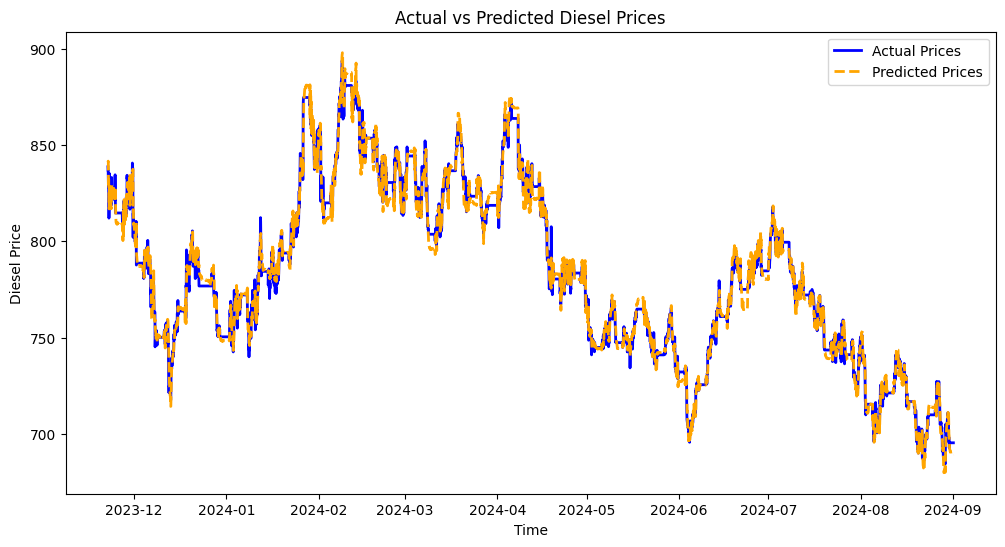

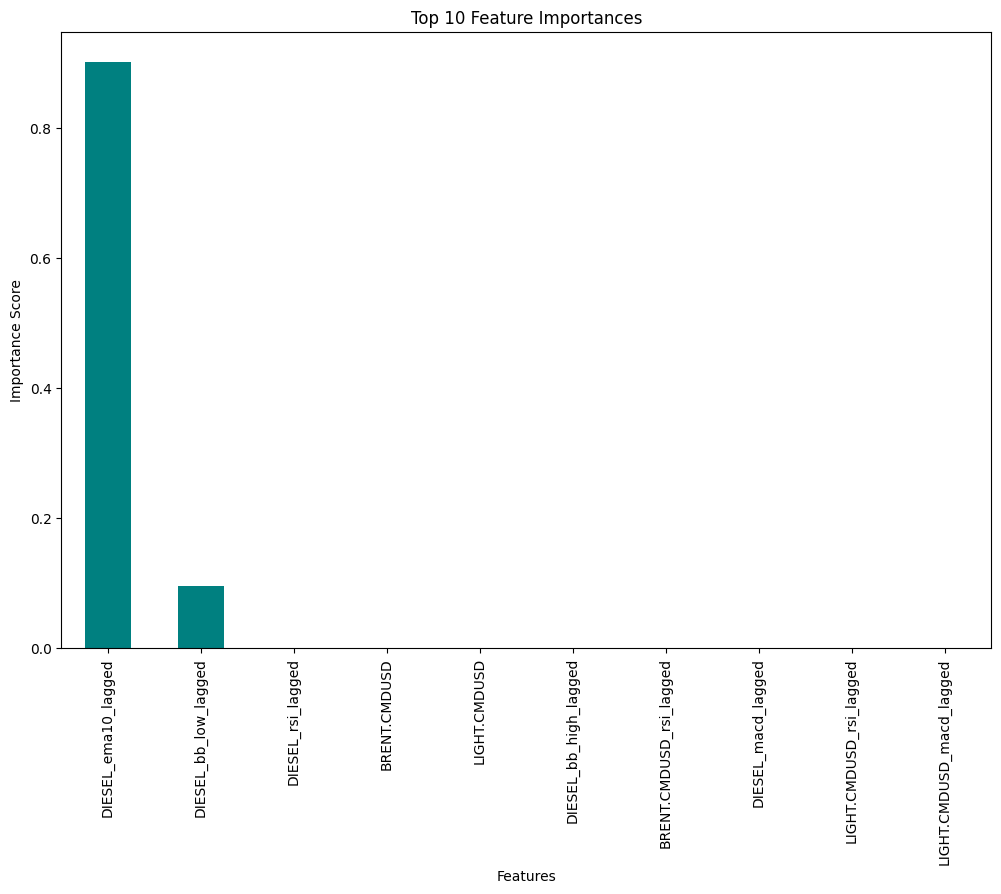

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import ta  # Technical Analysis library for indicators

# Filepaths for datasets
datasets = {
    'BRENT.CMDUSD': 'BRENT.CMDUSD_Candlestick_1_Hour_BID_01.01.2020-31.08.2024.csv',
    'LIGHT.CMDUSD': 'LIGHT.CMDUSD_Candlestick_1_Hour_BID_01.01.2020-31.08.2024.csv',
    'USTBOND.TRUSD': 'USTBOND.TRUSD_Candlestick_1_Hour_BID_01.01.2020-31.08.2024.csv',
    'COFFEE.CMDUSX': 'COFFEE.CMDUSX_Candlestick_1_Hour_BID_01.01.2020-31.08.2024.csv',
    'SOYBEAN.CMDUSX': 'SOYBEAN.CMDUSX_Candlestick_1_Hour_BID_01.01.2020-31.08.2024.csv',
    'EURUSD': 'EURUSD_Candlestick_1_Hour_BID_01.01.2020-31.08.2024.csv',
    'DOLLAR.IDXUSD': 'DOLLAR.IDXUSD_Candlestick_1_Hour_BID_01.01.2020-31.08.2024.csv',
    'SUGAR.CMDUSD': 'SUGAR.CMDUSD_Candlestick_1_Hour_BID_01.01.2020-31.08.2024.csv',
    'COTTON.CMDUSX': 'COTTON.CMDUSX_Candlestick_1_Hour_BID_01.01.2020-31.08.2024.csv',
    'GAS.CMDUSD': 'GAS.CMDUSD_Candlestick_1_Hour_BID_01.01.2020-31.08.2024.csv',
    'COPPER.CMDUSD': 'COPPER.CMDUSD_Candlestick_1_Hour_BID_01.01.2020-31.08.2024.csv',
    'USA30.IDXUSD': 'USA30.IDXUSD_Candlestick_1_Hour_BID_01.01.2020-31.08.2024.csv',
    'USA500.IDXUSD': 'USA500.IDXUSD_Candlestick_1_Hour_BID_01.01.2020-31.08.2024.csv',
    'DIESEL': 'DIESEL.CMDUSD_Candlestick_1_Hour_BID_01.01.2020-31.08.2024.csv'  # Target
}

# Initialize a DataFrame to store the merged data
merged_data = None

# Merge datasets based on Local time
for name, filepath in datasets.items():
    # Load the dataset
    data = pd.read_csv(filepath)
    # Parse datetime column
    data['Local time'] = pd.to_datetime(data['Local time'], format='%d.%m.%Y %H:%M:%S.%f GMT%z', utc=True)
    # Set datetime as index
    data.set_index('Local time', inplace=True)
    # Keep only the Close price and rename it
    data = data[['Close']].rename(columns={'Close': name})
    # Merge datasets
    if merged_data is None:
        merged_data = data
    else:
        merged_data = merged_data.join(data, how='inner')

# Add technical indicators with lagged features
for col in merged_data.columns:
    # Add lagged EMA (10-period, lagged by 1 hour)
    merged_data[f'{col}_ema10_lagged'] = ta.trend.EMAIndicator(merged_data[col], window=10).ema_indicator().shift(1)
    # Add lagged RSI (14-period, lagged by 1 hour)
    merged_data[f'{col}_rsi_lagged'] = ta.momentum.RSIIndicator(merged_data[col], window=14).rsi().shift(1)
    # Add lagged MACD (12, 26-period, lagged by 1 hour)
    macd = ta.trend.MACD(merged_data[col], window_slow=26, window_fast=12, window_sign=9)
    merged_data[f'{col}_macd_lagged'] = macd.macd().shift(1)
    # Add lagged Bollinger Bands (20-period, lagged by 1 hour)
    bb = ta.volatility.BollingerBands(merged_data[col], window=20)
    merged_data[f'{col}_bb_high_lagged'] = bb.bollinger_hband().shift(1)
    merged_data[f'{col}_bb_low_lagged'] = bb.bollinger_lband().shift(1)

# Drop rows with NaN values (resulting from rolling calculations and lagging)
merged_data = merged_data.dropna()

# Define target and features
target = merged_data['DIESEL']
features = merged_data.drop(columns=['DIESEL'])

# Time-series split for training and testing
tscv = TimeSeriesSplit(n_splits=5)
for train_index, test_index in tscv.split(features):
    X_train, X_test = features.iloc[train_index], features.iloc[test_index]
    y_train, y_test = target.iloc[train_index], target.iloc[test_index]

# Train the Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

# Print results
print(f"R-squared: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")

# Feature importance
importances = pd.Series(model.feature_importances_, index=features.columns).sort_values(ascending=False)
print("Top 10 Features by Importance:")
print(importances.head(10))

# Visualize Actual vs Predicted Prices
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label='Actual Prices', color='blue', linewidth=2)
plt.plot(y_test.index, y_pred, label='Predicted Prices', color='orange', linestyle='--', linewidth=2)
plt.xlabel('Time')
plt.ylabel('Diesel Price')
plt.title('Actual vs Predicted Diesel Prices')
plt.legend()
plt.show()

# Visualize Feature Importance
plt.figure(figsize=(12, 8))
importances.head(10).plot(kind='bar', color='teal')
plt.title('Top 10 Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.show()

# utility cure

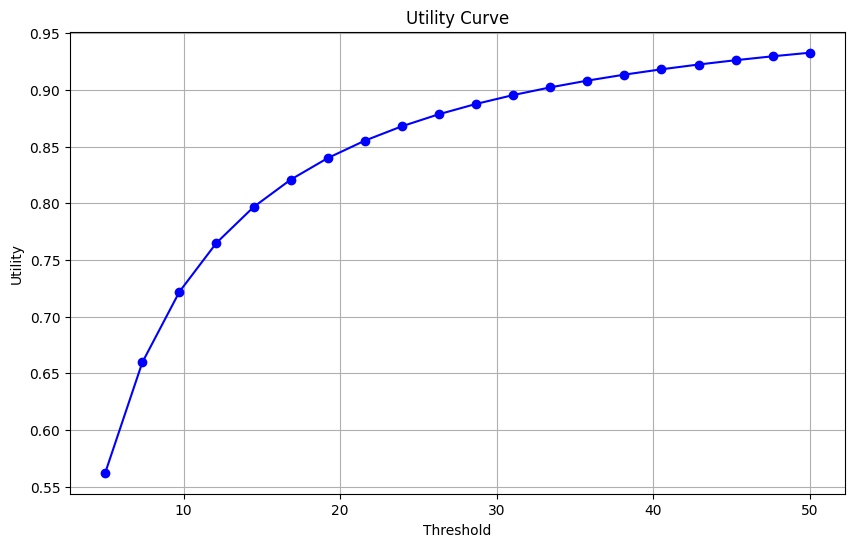

In [5]:
# Define a utility function to calculate utility values for different thresholds
def calculate_utility_curve(y_test, y_pred, thresholds):
    utility_values = []
    for threshold in thresholds:
        # Calculate the error
        errors = np.abs(y_test - y_pred)
        
        # Define utility: for this example, penalize high errors exponentially
        utility = np.sum(np.exp(-errors / threshold)) / len(errors)  # Higher utility for smaller errors
        utility_values.append(utility)
    
    return utility_values

# Define thresholds to evaluate (e.g., 5, 10, 20, 50)
thresholds = np.linspace(5, 50, 20)  # 20 thresholds between 5 and 50

# Calculate utility values
utility_values = calculate_utility_curve(y_test.values, y_pred, thresholds)

# Plot the utility curve
plt.figure(figsize=(10, 6))
plt.plot(thresholds, utility_values, marker='o', linestyle='-', color='blue')
plt.xlabel('Threshold')
plt.ylabel('Utility')
plt.title('Utility Curve')
plt.grid(True)
plt.show()


# coss-validation